# Explore here

In [1]:
import pandas as pd
import spotipy
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt

In [2]:
load_dotenv()

client_id = os.environ.get("Client_ID")
client_secret = os.environ.get("Client_secret")

sp = spotipy.Spotify(auth_manager=spotipy.oauth2.SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))


In [3]:
# Código de spotify del artista (en este caso los Strokes)
the_strokes = '0epOFNiUfyON9EYx7Tpr6V'

In [4]:
# Solicitud a la API con nuestras claves de acceso (sp) de los datos del artista - (sobra)
artist = sp.artist('0epOFNiUfyON9EYx7Tpr6V')

In [5]:
# Solicitud a la API del top de canciones del artista de interés
top_tracks_response = sp.artist_top_tracks(the_strokes)

In [6]:
# Extraemos la información de las canciones principales
top_tracks = top_tracks_response['tracks']

In [7]:
# Lista para almacenar los resultados (necesaria para posteriormente convertir a DataFrame)
best_songs_strokes = []

In [8]:
# Sacar nombre de la canción, duración y popularidad
# Iteramos sobre las canciones principales y mostramos sus nombres

print("Top 10 de canciones del artista:")
for i, track in enumerate(top_tracks[:10], 1):  # 1. enumerate() es una función de Python que toma una secuencia (en este caso, la lista top_tracks[:10] que contiene las primeras 10 canciones principales del artista)
    nombre = track['name']                      #   y devuelve un iterador que genera pares (índice, elemento) para cada elemento en la secuencia. El segundo argumento opcional 1 especifica el valor inicial del índice, que en este caso comienza en 1 en lugar del valor predeterminado 0.
    popularidad = track['popularity']           # 2. for i, track in ...: Esto es una declaración de bucle for que itera sobre los elementos generados por enumerate().
    duracion = track['duration_ms']             #   En cada iteración, i será el índice de la canción en la lista (1, 2, 3, ..., 10) y track será la información de la canción.
    print(f"{i}. {nombre} - {popularidad} - {duracion}")

    # Añadimos la información extraída de interés a la lista (dentro del bucle!!)
    best_songs_strokes.append({'Nombre': nombre, 'Popularidad': popularidad, 'Duración (ms)': duracion})

# Convertimos la lista en un DataFrame
data = pd.DataFrame(best_songs_strokes)

Top 10 de canciones del artista:
1. The Adults Are Talking - 81 - 309053
2. Last Nite - 69 - 193373
3. Reptilia - 77 - 219826
4. Someday - 69 - 183440
5. You Only Live Once - 74 - 189226
6. Call It Fate, Call It Karma - 71 - 204773
7. Selfless - 70 - 222093
8. 12:51 - 69 - 153133
9. Under Cover of Darkness - 68 - 235546
10. Ode To The Mets - 68 - 351786


In [14]:
# Ordenamos el dataframe por popularidad creciente y mostramos el top 3
data_ordenado = data.sort_values(by='Popularidad')
top_3 = data_ordenado.tail(3)
top_3

,Nombre,Popularidad,Duración (ms)
4,You Only Live Once,74,189226
2,Reptilia,77,219826
0,The Adults Are Talking,81,309053


Análisis popularidad - duracion

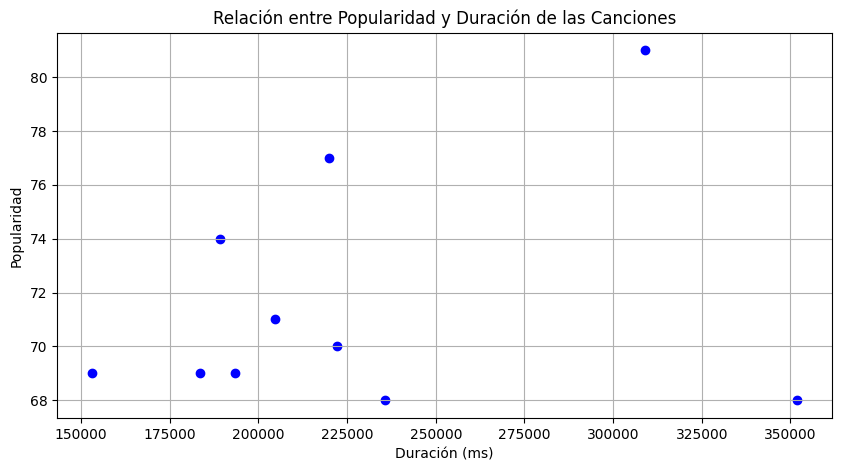

In [10]:

plt.figure(figsize=(10, 5))
plt.scatter(data['Duración (ms)'], data['Popularidad'], color='blue')
plt.title('Relación entre Popularidad y Duración de las Canciones')
plt.xlabel('Duración (ms)')
plt.ylabel('Popularidad')
plt.grid(True)
plt.show()


Correlación entre la popularidad y la duración de las canciones

In [11]:
correlacion = data['Popularidad'].corr(data['Duración (ms)'])
print("Correlación entre popularidad y duración:", correlacion)
# La correlación varía entre -1 y 1. Un valor cercano a 1 indica una correlación positiva (las variables aumentan juntas),
# un valor cercano a -1 indica una correlación negativa (una variable aumenta mientras que la otra disminuye)
# y un valor cercano a 0 indica una correlación débil o nula.
print(f"Como podemos observar tanto en el gráfico como en la metida cuantitativa ({correlacion}), apenas hay correlacion entre la popularidad de las canciones y su duración.")

Correlación entre popularidad y duración: 0.24196102914917741
Como podemos observar tanto en el gráfico como en la metida cuantitativa (0.24196102914917741), apenas hay correlacion entre la popularidad de las canciones y su duración.


Estadísticas descriptivas de la popularidad

In [15]:
popularity_stats = data['Popularidad'].describe()
print("Estadísticas descriptivas de la popularidad:")
popularity_stats

Estadísticas descriptivas de la popularidad:


count    10.000000
mean     71.600000
std       4.376706
min      68.000000
25%      69.000000
50%      69.500000
75%      73.250000
max      81.000000
Name: Popularidad, dtype: float64

La desviación estándar de la popularidad es relativamente baja, lo que indica que las puntuaciones de popularidad están relativamente cerca de la media, con una dispersión moderada alrededor de la media

Con estas estadísticas, podemos concluir que la mayoría de las canciones tienen una popularidad cercana a la media, con una dispersión moderada alrededor de ella. La popularidad de las canciones varía desde 70 hasta 83, con la mayoría de las canciones teniendo una popularidad en el rango de 70 a 75.


Matriz de correlación

In [13]:
matrix = data[['Popularidad', 'Duración (ms)']]
correlation_matrix = matrix.corr()
print(correlation_matrix)


               Popularidad  Duración (ms)
Popularidad       1.000000       0.241961
Duración (ms)     0.241961       1.000000


En conclusión, la duración de las canciones no tiene un efecto directo en su popularidad, hay otras variables que parecen influír más.

Sin embargo, si que hay una muy baja correlación positiva entre la popularidad y la duracion, así que podríamos decir que las canciones más largas suelen ser bastante populares. Esto puede deberse a que éstas tambien tienen una mayor elaboración, tanto técnica como artística, siendo apreciadas por sus oyentes tanto como otros singles más "comerciales".